# POLICY BENCHMARKS


## Test MSE gives a measure of how different the reconstructed image is of the original
## Test PSNR gives a measure of how similar they are
## Feature MSE gives a measure of how similar the model outputs are for the reconstructed image and the original. So essentially whether they are classified the same.

In [39]:
import os

import numpy as np
import torch

from torchvision import transforms

from PIL import Image

from importlib import reload

"""
    Override torch.load to transfer tensors to the cpu by default
    because it is called by np.load but np.load does not provide this functionality.
"""
reload(torch)
tl = torch.load
load_cpu = lambda *x, **y: tl(*x, **y, map_location=torch.device('cpu'))
torch.load = load_cpu


In [40]:

def read_images(path, prefix, idxs=range(0,100)):
    for i in idxs:
        try:
            yield Image.open(path + f'/{prefix}_{i+1}.jpg')
        except FileNotFoundError:
            yield Image.open(path + f'/{prefix}_{1}.jpg')

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed-sim-out_mode_normal_auglist__rlabel_False
Could not find metricc.npy
Originals: 


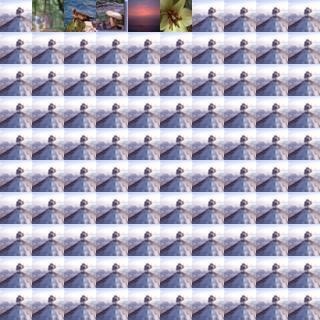

Reconstructions: 


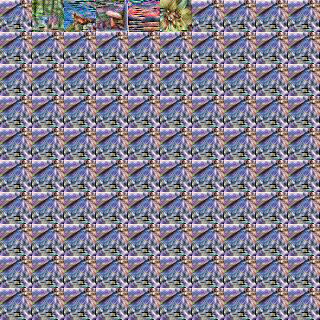

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False
feat_mse mean, std = (6.3515167236328125, 12.82642936706543)
test_mse mean, std = (0.11293302476406097, 0.04899730905890465)
test_psnr mean, std = (9.942355155944824, 2.1894450187683105)
Originals: 


<ipython-input-76-36329053a89a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(list(torch.tensor(m[metric_name]) for m in metrics))


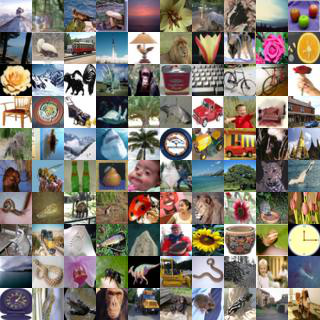

Reconstructions: 


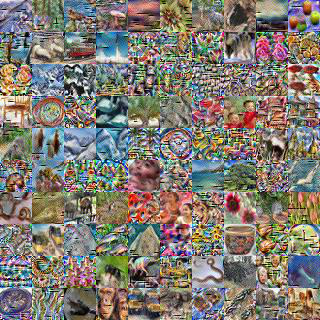

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-39_rlabel_False
feat_mse mean, std = (39.21037673950195, 86.7845687866211)
test_mse mean, std = (0.22037763893604279, 0.06150875613093376)
test_psnr mean, std = (6.781280040740967, 1.4697388410568237)
Originals: 


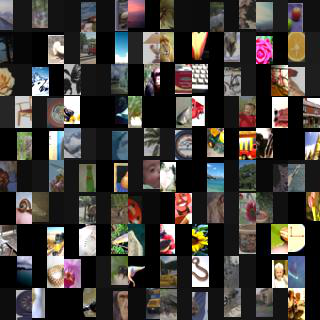

Reconstructions: 


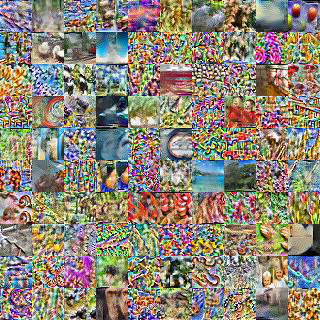

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-4_rlabel_False
feat_mse mean, std = (17.245573043823242, 31.560636520385742)
test_mse mean, std = (0.2189447581768036, 0.05849664285778999)
test_psnr mean, std = (6.804617881774902, 1.482336401939392)
Originals: 


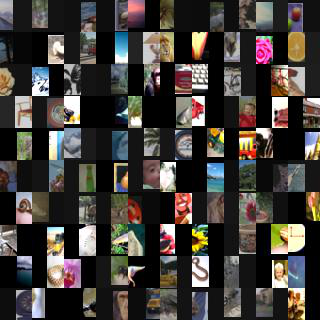

Reconstructions: 


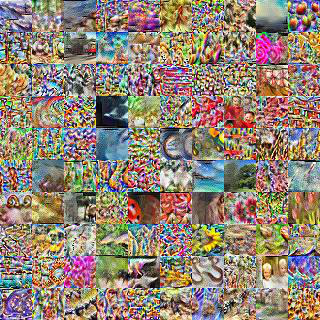

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_False
feat_mse mean, std = (18.70232391357422, 40.70404052734375)
test_mse mean, std = (0.19259798526763916, 0.06577225029468536)
test_psnr mean, std = (7.4775614738464355, 1.8535131216049194)
Originals: 


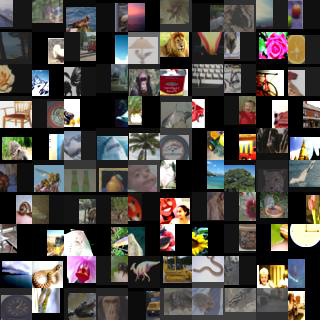

Reconstructions: 


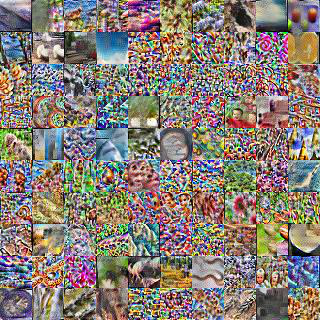

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_43-18-18_rlabel_False
feat_mse mean, std = (7.867159366607666, 14.906636238098145)
test_mse mean, std = (0.14551053941249847, 0.05513932183384895)
test_psnr mean, std = (8.710941314697266, 1.8055634498596191)
Originals: 


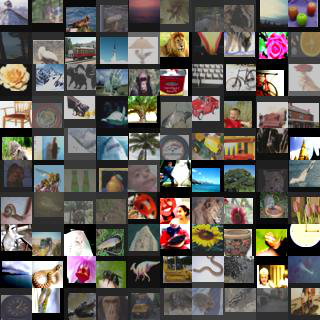

Reconstructions: 


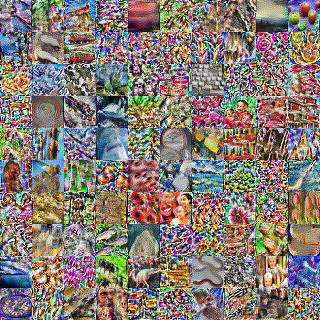

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed-sgd-sim_mode_normal_auglist__rlabel_False
feat_mse mean, std = (6.665778160095215, 14.73684024810791)
test_mse mean, std = (0.11312355846166611, 0.04879339784383774)
test_psnr mean, std = (9.92032241821289, 2.1382393836975098)
Originals: 


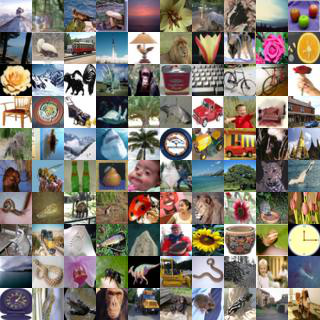

Reconstructions: 


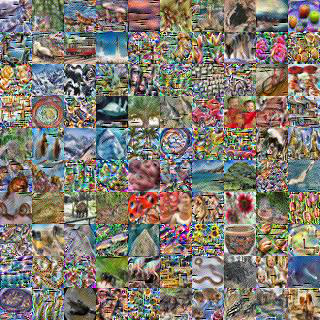

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7_rlabel_False
feat_mse mean, std = (33.52641296386719, 63.566123962402344)
test_mse mean, std = (0.24090208113193512, 0.04705602675676346)
test_psnr mean, std = (6.2841691970825195, 1.0237386226654053)
Originals: 


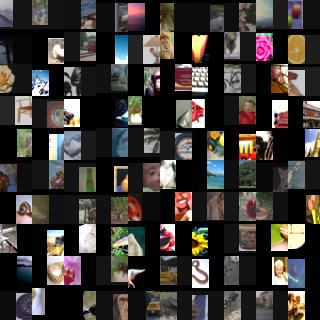

Reconstructions: 


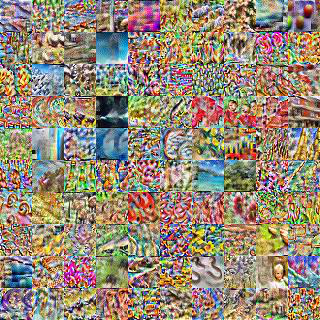

In [76]:
def visualize_images(root, additional_images=False):
    modes = os.listdir(root)


    for mode in modes:
        print(mode)
        try:
            metrics = np.load(root + mode + '/metric.npy', allow_pickle=True)
            for metric_name in sorted(metrics[0].keys()):
                scores = torch.tensor(list(torch.tensor(m[metric_name]) for m in metrics))
                print(f"{metric_name} mean, std = {float(scores.mean()), float(scores.std())}")
            
#             test_mse = np.array(list(m['test_mse'] for m in metrics))
#             feat_mse = np.array(list(m['feat_mse'].detach().numpy() for m in metrics))
#             test_psnr = np.array(list(m['test_psnr'] for m in metrics))
#             test_psnr = np.array(list(m['test_psnr'] for m in metrics))
#             print(f"Test MSE mean, std = {test_mse.mean(), test_mse.std()}")
#             print(f"Feature MSE mean, std = {feat_mse.mean(), feat_mse.std()}")
#             print(f"Test PSNR mean, std = {test_psnr.mean(), test_psnr.std()}")
        except FileNotFoundError:
            print("Could not find metricc.npy")

        print("Originals: ")
        imgs = read_images(root + mode, 'ori')
        grid = image_grid(list(imgs), 10, 10)
        display(grid)

        print("Reconstructions: ")
        imgs = read_images(root + mode, 'rec')
        grid = image_grid(list(imgs), 10, 10)
        display(grid)
        
        if additional_images:
#             print("Reconstructions, aligned: ")
#             imgs = read_images(root + mode, 'rec_aligned')
#             grid = image_grid(list(imgs), 10, 10)
#             display(grid)
            
            print("Reconstructions, untransformed: ")
            imgs = read_images(root + mode, 'rec_untransformed')
            grid = image_grid(list(imgs), 10, 10)
            display(grid)
            
            print("Reconstructions, isolated: ")
            imgs = read_images(root + mode, 'rec_isolated')
            grid = image_grid(list(imgs), 10, 10)
            display(grid)
            
            print("Originals, isolated: ")
            imgs = read_images(root + mode, 'ori_isolated')
            grid = image_grid(list(imgs), 10, 10)
            display(grid)
        
    
visualize_images('ATSPrivacy-Framework/benchmark/images/')

# Below are some plots of the alternate attack method so far, missing images because it is currently running

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7_rlabel_False_reaugment_translate_clipped1
feat_mse mean, std = (9.20569896697998, 20.621782302856445)
test_mse mean, std = (0.1264495849609375, 0.07237543910741806)
test_mse_isolated mean, std = (0.07279785722494125, 0.055527620017528534)
test_mse_isolated_area mean, std = (0.10598878562450409, 0.057355836033821106)
test_mse_untransformed mean, std = (0.17479948699474335, 0.04240010306239128)
test_psnr mean, std = (9.975001335144043, 3.385897159576416)
test_psnr_isolated mean, std = (12.420519828796387, 3.0429389476776123)
test_psnr_isolated_area mean, std = (10.46107292175293, 2.6976559162139893)
test_psnr_untransformed mean, std = (7.700684547424316, 1.0859651565551758)
Originals: 


<ipython-input-76-36329053a89a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(list(torch.tensor(m[metric_name]) for m in metrics))


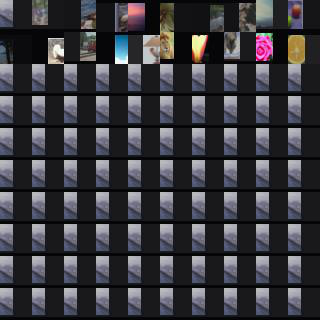

Reconstructions: 


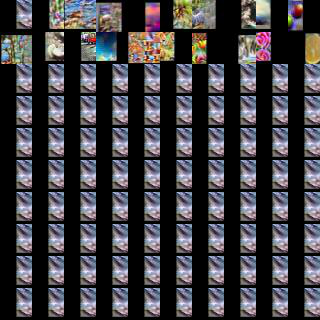

Reconstructions, untransformed: 


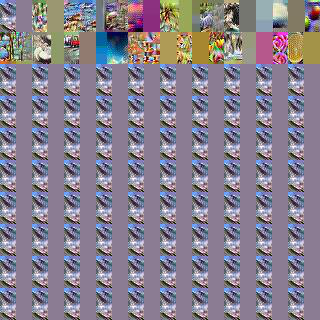

Reconstructions, isolated: 


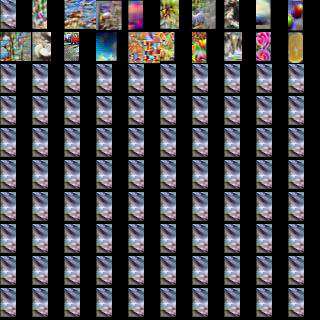

Originals, isolated: 


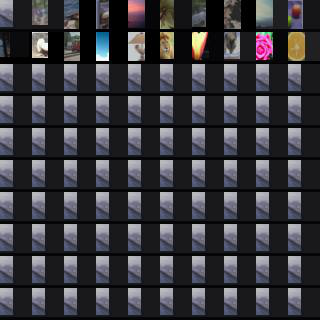

In [79]:
visualize_images('ATSRefactored/results/images/', additional_images=True)